### Importing the required Packages

In [1]:
import sys
sys.path.append('../')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
from utils.understat_scraper_utils import scrape_shots
from utils.helper_utils import convert_to_statsbomb
from utils.helper_utils import statsbomb_pitch_vert
from utils.helper_utils import shot_map

### Scraping Kai Havertz's Shot data from understat 

In [2]:
havertz_shots = scrape_shots(
    player_id='5220' 
)

havertz_shots.head()

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,129556,28,MissedShots,0.9569999694824218,0.39099998474121095,0.0838283896446228,Kai Havertz,h,5220,OpenPlay,2016,LeftFoot,2810,Bayer Leverkusen,Darmstadt,3,2,2016-11-05 18:30:00,None,None
1,130864,79,SavedShot,0.7719999694824219,0.3940000152587891,0.04243873059749603,Kai Havertz,a,5220,OpenPlay,2016,LeftFoot,2830,Bayern Munich,Bayer Leverkusen,2,1,2016-11-26 21:30:00,Chicharito,Pass
2,131045,84,MissedShots,0.8080000305175781,0.7730000305175782,0.013685217127203941,Kai Havertz,a,5220,OpenPlay,2016,LeftFoot,3209,Schalke 04,Bayer Leverkusen,0,1,2016-12-11 20:30:00,None,Rebound
3,130238,30,MissedShots,0.935,0.4229999923706055,0.031254395842552185,Kai Havertz,a,5220,FromCorner,2016,Head,3226,FC Cologne,Bayer Leverkusen,1,1,2016-12-21 23:00:00,Julian Brandt,Aerial
4,130249,68,MissedShots,0.879000015258789,0.3609999847412109,0.103481724858284,Kai Havertz,a,5220,OpenPlay,2016,RightFoot,3226,FC Cologne,Bayer Leverkusen,1,1,2016-12-21 23:00:00,Julian Brandt,Pass


### Filtering out the data from Chelsea and Bayer Leverkusen into different dataframes

In [3]:
filt = (
    (havertz_shots['h_team'] == 'Chelsea')
    | (havertz_shots['a_team'] == 'Chelsea')
)

# Filtering out Shots taken in Chelsea:
chelsea_shots = havertz_shots[filt]

filt1 = (
    (havertz_shots['h_team'] == 'Bayer Leverkusen')
    | (havertz_shots['a_team'] == 'Bayer Leverkusen')
)

# Filtering out Shots taken in Leverkusen:
bayer_shots = havertz_shots[filt1]

In [4]:
filt2 = (
    (bayer_shots['season'] == '2018')
    | (bayer_shots['season'] == '2019')
)

bayer_shots = bayer_shots[filt2]

bayer_shots.head()

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
67,221628,30,MissedShots,0.720999984741211,0.5790000152587891,0.01756482757627964,Kai Havertz,h,5220,OpenPlay,2018,LeftFoot,10351,Bayer Leverkusen,Wolfsburg,1,3,2018-09-01 13:30:00,None,None
68,221638,52,MissedShots,0.78,0.54,0.0331185907125473,Kai Havertz,h,5220,OpenPlay,2018,RightFoot,10351,Bayer Leverkusen,Wolfsburg,1,3,2018-09-01 13:30:00,Kevin Volland,Pass
69,223384,78,MissedShots,0.7319999694824219,0.4,0.014090852811932564,Kai Havertz,a,5220,OpenPlay,2018,LeftFoot,10360,Bayern Munich,Bayer Leverkusen,3,1,2018-09-15 13:30:00,None,None
70,225833,5,MissedShots,0.8619999694824219,0.38,0.07183926552534103,Kai Havertz,h,5220,OpenPlay,2018,RightFoot,10371,Bayer Leverkusen,Mainz 05,1,0,2018-09-23 13:30:00,Lucas Alario,Pass
71,225846,42,MissedShots,0.885,0.40799999237060547,0.10308082401752472,Kai Havertz,h,5220,OpenPlay,2018,RightFoot,10371,Bayer Leverkusen,Mainz 05,1,0,2018-09-23 13:30:00,Mitchell Weiser,Pass


### Selecting the required columns

In [5]:
chelsea_shots = chelsea_shots[
    ['X', 'Y', 'xG' , 'result', 
    'player', 'situation', 
    'season', 'shotType', 'player']
]

bayer_shots = bayer_shots[
    ['X', 'Y', 'xG' , 'result', 
    'player', 'situation', 
    'season', 'shotType', 'player']
]

### Converting X-Y coordinates to Statsbomb cooridnate scale

In [6]:
chelsea_shots = convert_to_statsbomb(
    data=chelsea_shots,
    x_cords='X',
    y_cords='Y'
)

bayer_shots = convert_to_statsbomb(
    data=bayer_shots,
    x_cords='X',
    y_cords='Y'
)

### Filtering out Penalties

In [7]:
filt_chels_pen = (
    chelsea_shots['situation'] != 'Penalty'
)

# Filtering out Non-Penalty Shots in Chelsea
chelsea_shots = chelsea_shots[filt_chels_pen]

filt_bayer_pen = (
    bayer_shots['situation'] != 'Penalty'
)

# Filtering out Non-Penalty Shots taken in Bayer
bayer_shots = bayer_shots[filt_bayer_pen]

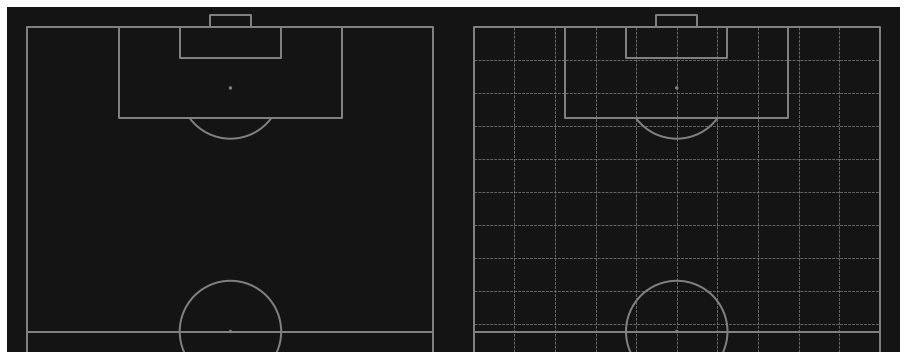

In [8]:
fig = plt.subplots(figsize=(16,10))

ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

bg = "#141414"


statsbomb_pitch_vert(
    ax = ax1,
    bg=bg,
    grid = False
)

statsbomb_pitch_vert(
    ax = ax2,
    bg=bg,
    grid = True
)

plt.subplots_adjust(wspace = -.0005)

<AxesSubplot:>

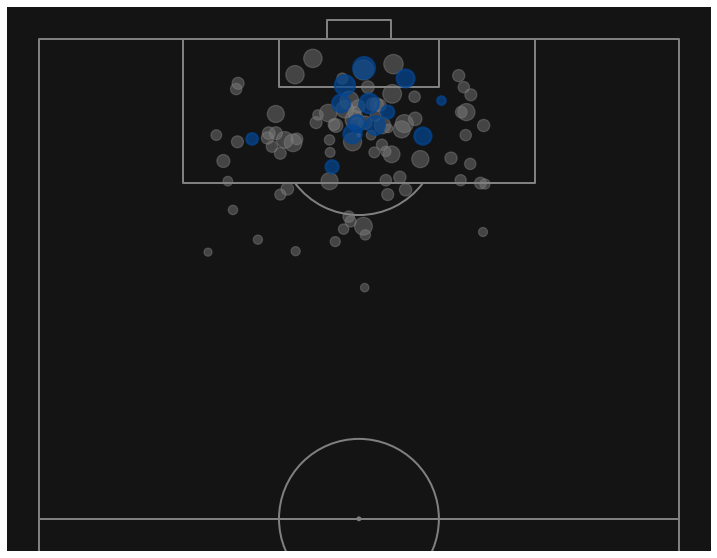

In [9]:
fig, ax = plt.subplots(figsize=(16,10))

bg = "#141414"


statsbomb_pitch_vert(
    ax = ax,
    bg=bg,
    grid = False
)

shot_map(
    axis = ax,
    data = chelsea_shots,
    situation = "Goal",
    x_pos = 'X',
    y_pos = 'Y',
    color = '#034694',
    edge_col = '#034694' 
)

shot_map(
    axis = ax,
    data = chelsea_shots,
    situation = "No Goal",
    x_pos = 'X',
    y_pos = 'Y',
    color = 'grey',
    edge_col = 'grey' 
)